In [123]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
%matplotlib inline
smp_cov = 1
smp_mean = 0

https://en.wikipedia.org/wiki/Conjugate_prior

In [124]:
sample = sps.norm.rvs(size=100, loc=smp_mean, scale=smp_cov)

In [125]:
#get argmax of likelyhood function for N(\theta , 1)
n = np.arange(1,101,1)
likelyhood_mean_evl = [abs(sample[0:k+1].mean()) for k in n]

In [113]:
def get_bayesian_mean_evaluation(X, prior_params) :
    pr_mean,pr_cov = prior_params
    return (pr_mean/pr_cov + np.sum(X)/smp_cov)/(1/pr_cov + len(X)/smp_cov)

In [126]:
#calc bayesian mean evaluations for all sets of params
prior_mean_params =  [(0, 1), (0, 100), (10, 1), (10, 100)]
bayesian_mean_evl = [[abs(get_bayesian_mean_evaluation(
                            sample[0:k+1],prior_mean_params[i])) 
                      for k in n]
                     for i in range(4)]

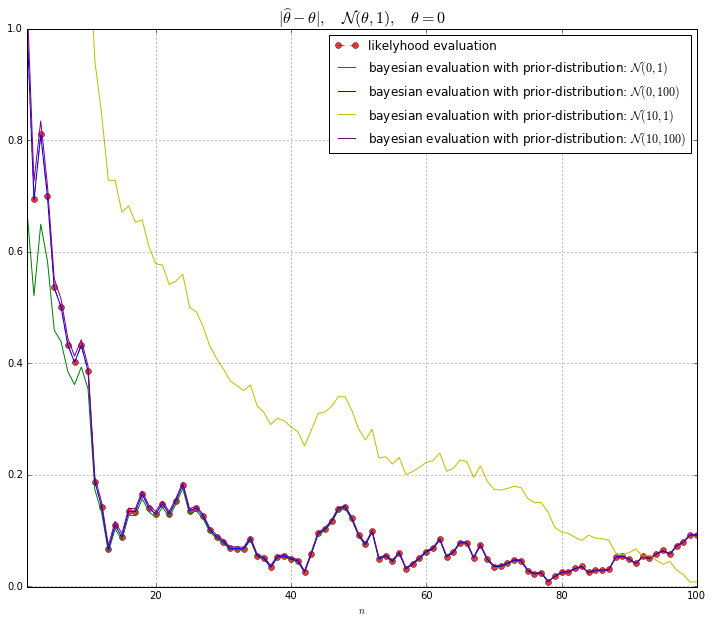

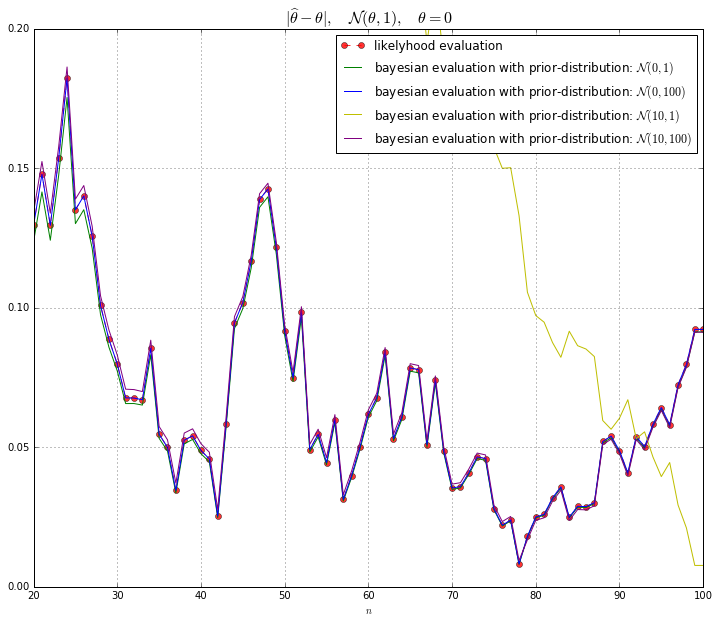

In [128]:
colors = ['--or' , 'g' , 'b' , 'y', 'purple']
title = r'$|\widehat{\theta} - \theta|,$'\
          +r'$\quad \mathcal{N}(\theta,1),$'\
          +r'$\quad \theta = 0$'
#build plot with absolute evaluation's deviations
def build_plot(axis_params):
    plt.figure(figsize=(12,10))
    plt.title(title, fontsize=16)
    plt.xlabel(r'$n$')
    plt.axis(axis_params)
    plt.grid(True)
    plt.plot(n,likelyhood_mean_evl,colors[0],
             label = 'likelyhood evaluation',
             alpha=0.8)
    for i in range(4):
        plt.plot(n, bayesian_mean_evl[i],colors[i+1],
                    label = 'bayesian evaluation with prior-distribution: '
                              + r'$\mathcal{N}('
                              + str(prior_mean_params[i][0]) + ','
                              + str(prior_mean_params[i][1]) + r')$')
    plt.legend()
    plt.show()

build_plot([1,100 , -0.001 , 1])
build_plot([20,100 , 0 , 0.2])


Баесовская оценка мат.ожидания нормального распределения асимптотически равна оценке максимального правдоподобия, что и видно на графиках. Также, важна точность подбора априорного распределения. Для $\mathcal{N}(10,1)$ ожидаемое значение $\theta$ отличается на 10 от реального, и имеет малую дисперсию, поэтому график этой оценки отличается сильнее и дает более слабое приближение. В случае $\mathcal{N}(10,100)$ этого не происходит, так как велико значение дисперсии.

In [173]:
def scale_in_mean(params) :
    nu,tau2 = params
    if nu > 2 :
        return (nu * tau2)/(nu - 2)
    return -np.inf

def get_cov(X,mean):
    return np.sum([(x - mean) ** 2 for x in X])

def get_bayesian_cov_evaluation(X, prior_params):
    prior_mean, prior_cov = prior_params
    nu = len(X) + prior_mean
    tau2 = (prior_mean * prior_cov + get_cov(X,smp_mean))/(prior_mean + len(X))
    return scale_in_mean((nu,tau2))

In [174]:
#get argmax of likelyhood function for N(1 , \sigma^2)
n = np.arange(1,101,1)
likelyhood_cov_evl = [abs(1 - np.power(sample[0:k+1],2).mean()) for k in n]

In [175]:
#calc bayesian covariation - evaluations for all sets of params
prior_cov_params = [(1, 1), (1, 100), (10, 1), (10, 100)]
bayesian_cov_evl = [[abs(1-get_bayesian_cov_evaluation(
                            sample[0:k+1],prior_cov_params[i])) 
                      for k in n]
                     for i in range(4)]

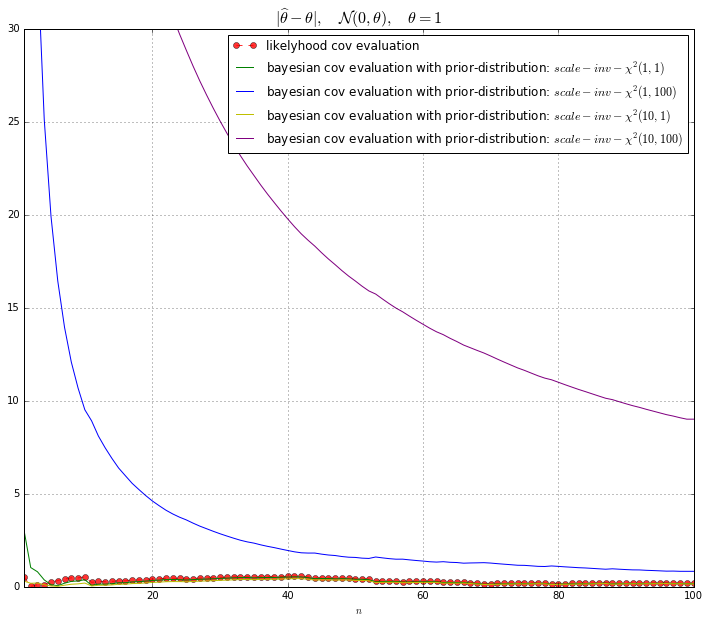

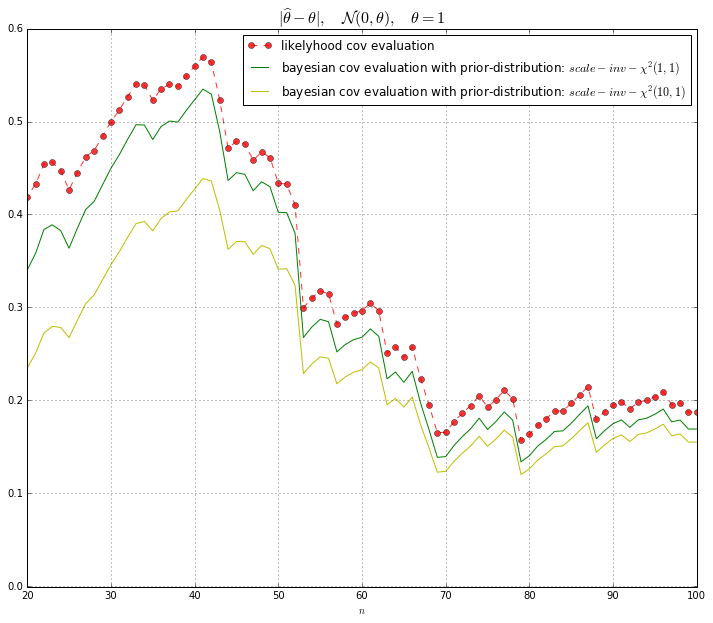

In [176]:
colors = ['--or' , 'g' , 'b' , 'y', 'purple']
title = r'$|\widehat{\theta} - \theta|,$'\
          +r'$\quad \mathcal{N}(0,\theta),$'\
          +r'$\quad \theta = 1$'
#build plot with absolute evaluation's deviations
def build_plot(axis_params,exclude={}):
    plt.figure(figsize=(12,10))
    plt.title(title, fontsize=16)
    plt.xlabel(r'$n$')
    plt.axis(axis_params)
    plt.grid(True)
    plt.plot(n,likelyhood_cov_evl,colors[0],
             label = 'likelyhood cov evaluation',
             alpha=0.8)
    for i in range(4):   
        #skip some evaluations
        if i in exclude: 
            continue;
        plt.plot(n, bayesian_cov_evl[i],colors[i+1],
                    label = 'bayesian cov evaluation with prior-distribution: '
                              + r'$scale-inv-\chi^2('
                              + str(prior_cov_params[i][0]) + ','
                              + str(prior_cov_params[i][1]) + r')$')
    plt.legend()
    plt.show()

build_plot([1,100 , -0.001 , 30])
build_plot([20,100 , -0.001 , 0.6],{1,3})


In [177]:
def scale_in_mode(params) :
    nu , tau2 = params
    return (nu*tau2)/(nu+2)

In [199]:
sci_mode = [scale_in_mode(params) for params in prior_cov_params]
sci_mean = [scale_in_mean(params) for params in prior_cov_params]
for i in range(len(prior_cov_params)) :
    print('sci(' + str(prior_cov_params[i][0]) + ','
            + str(prior_cov_params[i][1]) + ')  '
            + "mean: " + str(sci_mean[i]) + " , mode: " + str(round(sci_mode[i],3)))

sci(1,1)  mean: -inf , mode: 0.333
sci(1,100)  mean: -inf , mode: 33.333
sci(10,1)  mean: 1.25 , mode: 0.833
sci(10,100)  mean: 125.0 , mode: 83.333


При правильном подборе априорного распределения байесовские оценки довольно точны, и сравнимы с оценкой максимального правдоподобия.

В задаче $\theta$ = 1, $sci(1,1)$ и $sci(10,1)$ дают более точное предположение об истинном значении параметра.

$Mode_{sci(1,1)} \theta \approx 0.33$ (мат ожидания нет)

$E_{sci(10,1)} \theta = 1.25$

$sci(1,100)$ и $sci(10,100)$ оценивают параметр значительно хуже.

$Mode_{sci(1,100)} \theta \approx 33.33$ (мат ожидания нет)

$E_{sci(10,100)} \theta = 125.0$

